In [ ]:
import os
import torch
import random
import ast
import numpy as np
from datasets import Dataset
from process_data_kmeansCISLR import get_pose_keypoints
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer
import pandas as pd

train_df = pd.read_csv('/DATA3/vaibhav/isign/PretrainingISL/train_MTWASL16M.csv') 
train_df.columns
train_df = train_df.rename(columns={'uids': 'uid_list'})
train_df = train_df.sample(n = 100000)
train_video_uids = train_df['uid_list'].apply(ast.literal_eval).tolist()
video_dir = "/DATA7/sanjeet/ISL/WLASL/start_kit/pose_video/"

def load_and_preprocess_features(video_paths):
    all_features_length = 0
    for video_path in video_paths:
        # Construct the full path to the pose file
        if len(video_path) == 0:
            continue
        else:
            # Random sample a video from the list of videos
            video_path = random.choice(video_path)
        pose_file_path = os.path.join(video_dir, video_path + '.pose')
        # Load the pose file
        data_buffer = open(pose_file_path, "rb").read()
        pose = Pose.read(data_buffer)
        all_features_length += pose.body.data.shape[0]
    return all_features_length
        
# Make a dictionary for calculating the number of frames in each video
num_frames_dict = {}
for video_path in train_video_uids:
    feature_len = load_and_preprocess_features(video_path)
    #print(feature_len)
    # Add feature length to the dictionary if it is not already present else increment the count
    if feature_len not in num_frames_dict:
        num_frames_dict[feature_len] = 1
    else:
        num_frames_dict[feature_len] += 1




MT mean and std of the number of frames in the dataset
497.51378 220.6403195930235


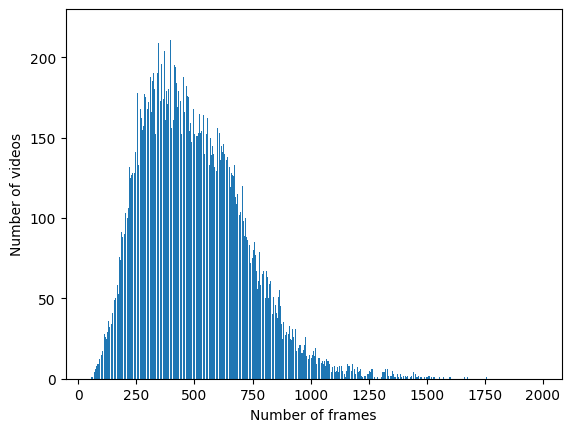

In [2]:
# Get the mean and standard deviation of the number of frames of all the videos in the dataset
# Get the key multiply it by the count and sum it up and then take the mean

mean_num_frames = sum([key * value for key, value in num_frames_dict.items()]) / sum(num_frames_dict.values())
std_num_frames = np.sqrt(sum([value * (key - mean_num_frames) ** 2 for key, value in num_frames_dict.items()]) / sum(num_frames_dict.values()))
print("MT mean and std of the number of frames in the dataset")
print(mean_num_frames, std_num_frames)


# Plot the num_frames_dict to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict.keys(), num_frames_dict.values())
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()





In [3]:
POSE_DIR_ISIGN = "/DATA7/sanjeet/ISL/WLASL/How2Sign/videos/How2Sign_pose_all/"

def load_and_preprocess_features_isign(video_path):
    video_path = POSE_DIR_ISIGN+video_path+'.pose'
    data_buffer = open(video_path, "rb").read()
    pose = Pose.read(data_buffer)
    # if self.step_frames is None:
    #     self.step_frames = np.random.randint(2, 16)
    return pose.body.data.shape[0]

train_df2 = pd.read_csv('/DATACSEShare/sanjeet/Dataset/Sign_lanuguage_data_set/How2Sign/How2sign_original/How2sign_train_with_without_punctuation.csv')
train_df2 = train_df2.rename(columns={'sentence_with_punctuation': 'text', 'SENTENCE_ID': 'uid'})
#train_df2 = train_df2.sample(n = 1000)
train_video_uids2 = train_df2['uid'].tolist()
#Make a dictionary for calculating the number of frames in each video

num_frames_dict_isign = {}
for video_path in train_video_uids2:
    feature_len = load_and_preprocess_features_isign(video_path)
    #print(feature_len)
    # Add feature length to the dictionary if it is not already present else increment the count
    if feature_len not in num_frames_dict_isign:
        num_frames_dict_isign[feature_len] = 1
    else:
        num_frames_dict_isign[feature_len] += 1






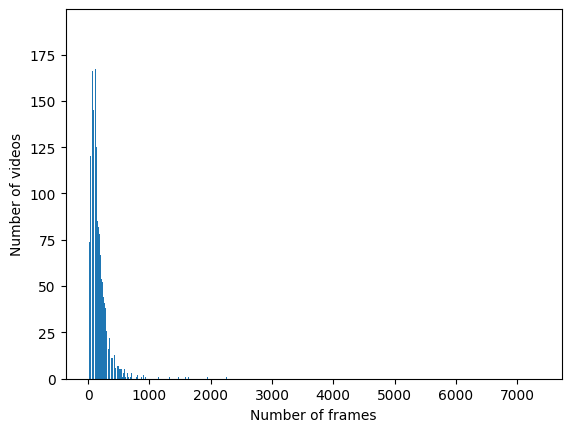

174.3677794931172 172.80639463591825


In [4]:
# Plot the num_frames_dict to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict_isign.keys(), num_frames_dict_isign.values())
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()



mean_num_frames = sum([key * value for key, value in num_frames_dict_isign.items()]) / sum(num_frames_dict_isign.values())
std_num_frames = np.sqrt(sum([value * (key - mean_num_frames) ** 2 for key, value in num_frames_dict_isign.items()]) / sum(num_frames_dict_isign.values()))
print(mean_num_frames, std_num_frames)


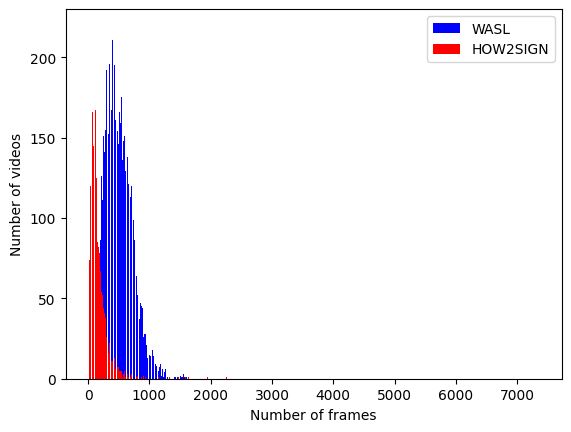

In [5]:
# Plot the num_frames_dict and the num_frames_dict_isign to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict.keys(), num_frames_dict.values(), color = 'b', label = 'WASL')
plt.bar(num_frames_dict_isign.keys(), num_frames_dict_isign.values(), color = 'r', label = 'HOW2SIGN')
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.legend()
plt.show()


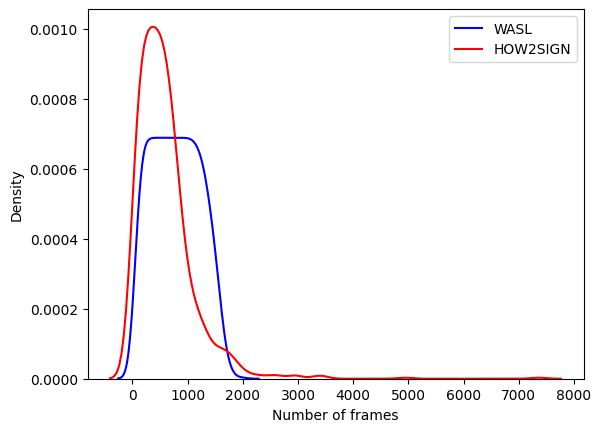

In [6]:
# Plot a kde plot of  the same
import seaborn as sns
sns.kdeplot(list(num_frames_dict.keys()), color = 'b', label = 'WASL')
sns.kdeplot(list(num_frames_dict_isign.keys()), color = 'r', label = 'HOW2SIGN')
plt.xlabel('Number of frames')
plt.ylabel('Density')
plt.legend()
plt.show()

In [1]:
import os
import torch
import random
import ast
import numpy as np
from datasets import Dataset
from process_data_kmeansCISLR import get_pose_keypoints
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer
import pandas as pd

#train_df = pd.read_csv('/DATA3/vaibhav/isign/PretrainingISL/train_MTWASL16M.csv') 
train_df = pd.read_csv('/DATACSEShare/sanjeet/code/Voacb_count/AI4Bhatrat_WLASL/1.1M_90%_AI4Bharat_WALASL_with_without_punctuation_with_uid.csv')
train_df.columns
train_df = train_df.rename(columns={'uids': 'uid_list'})
train_df = train_df.sample(n = 100000)
train_video_uids = train_df['uid_list'].apply(ast.literal_eval).tolist()
video_dir = "/DATA7/sanjeet/ISL/WLASL/start_kit/pose_video/"

def load_and_preprocess_features(video_paths):
    all_features_length = 0
    for video_path in video_paths:
        # Construct the full path to the pose file
        if len(video_path) == 0:
            continue
        else:
            # Random sample a video from the list of videos
            video_path = random.choice(video_path)
        pose_file_path = os.path.join(video_dir, video_path + '.pose')
        # Load the pose file
        random_frame = random.randint(1, 4) + 3
        data_buffer = open(pose_file_path, "rb").read()
        pose = Pose.read(data_buffer)
        all_features_length += (pose.body.data.shape[0] // random_frame)
    return all_features_length
        
# Make a dictionary for calculating the number of frames in each video
num_frames_dict = {}
for video_path in train_video_uids:
    feature_len = load_and_preprocess_features(video_path)
    #print(feature_len)
    # Add feature length to the dictionary if it is not already present else increment the count
    if feature_len not in num_frames_dict:
        num_frames_dict[feature_len] = 1
    else:
        num_frames_dict[feature_len] += 1




/home/el/miniconda3/envs/nmt2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MT mean and std of the number of frames in the dataset
166.56192 100.73714521423365


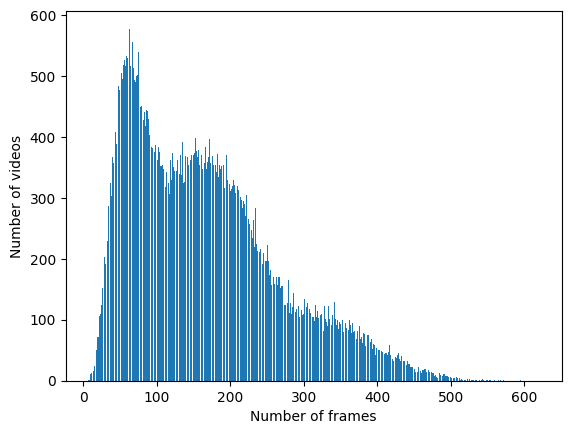

In [2]:
# Get the mean and standard deviation of the number of frames of all the videos in the dataset
# Get the key multiply it by the count and sum it up and then take the mean

mean_num_frames = sum([key * value for key, value in num_frames_dict.items()]) / sum(num_frames_dict.values())
std_num_frames = np.sqrt(sum([value * (key - mean_num_frames) ** 2 for key, value in num_frames_dict.items()]) / sum(num_frames_dict.values()))
print("MT mean and std of the number of frames in the dataset")
print(mean_num_frames, std_num_frames)


# Plot the num_frames_dict to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict.keys(), num_frames_dict.values())
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()





In [10]:
POSE_DIR_ISIGN = "/DATA7/sanjeet/ISL/WLASL/How2Sign/videos/How2Sign_pose_all/"

def load_and_preprocess_features_isign(video_path):
    video_path = POSE_DIR_ISIGN+video_path+'.pose'
    data_buffer = open(video_path, "rb").read()
    pose = Pose.read(data_buffer)
    random_frame = random.randint(1, 4)
    # if self.step_frames is None:
    #     self.step_frames = np.random.randint(2, 16)
    return pose.body.data.shape[0] // random_frame

train_df2 = pd.read_csv('/DATACSEShare/sanjeet/Dataset/Sign_lanuguage_data_set/How2Sign/How2sign_original/How2sign_train_with_without_punctuation.csv')
train_df2 = train_df2.rename(columns={'sentence_with_punctuation': 'text', 'SENTENCE_ID': 'uid'})
#train_df2 = train_df2.sample(n = 1000)
train_video_uids2 = train_df2['uid'].tolist()
#Make a dictionary for calculating the number of frames in each video

num_frames_dict_isign = {}
for video_path in train_video_uids2:
    feature_len = load_and_preprocess_features_isign(video_path)
    #print(feature_len)
    # Add feature length to the dictionary if it is not already present else increment the count
    if feature_len not in num_frames_dict_isign:
        num_frames_dict_isign[feature_len] = 1
    else:
        num_frames_dict_isign[feature_len] += 1






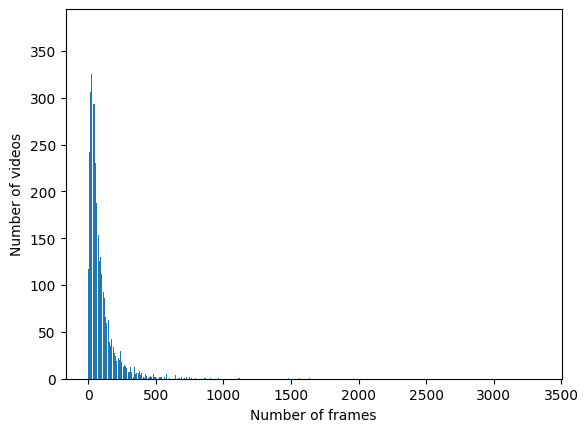

91.46439598610576 115.46283110533126


In [11]:
# Plot the num_frames_dict to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict_isign.keys(), num_frames_dict_isign.values())
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()



mean_num_frames = sum([key * value for key, value in num_frames_dict_isign.items()]) / sum(num_frames_dict_isign.values())
std_num_frames = np.sqrt(sum([value * (key - mean_num_frames) ** 2 for key, value in num_frames_dict_isign.items()]) / sum(num_frames_dict_isign.values()))
print(mean_num_frames, std_num_frames)


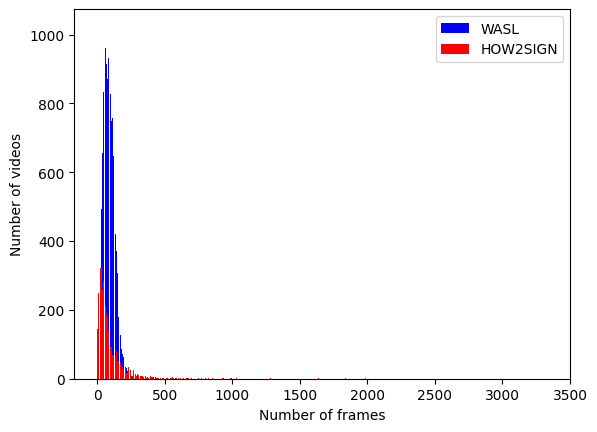

In [12]:
# Plot the num_frames_dict and the num_frames_dict_isign to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict.keys(), num_frames_dict.values(), color = 'b', label = 'WASL')
plt.bar(num_frames_dict_isign.keys(), num_frames_dict_isign.values(), color = 'r', label = 'HOW2SIGN')
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.legend()
plt.show()


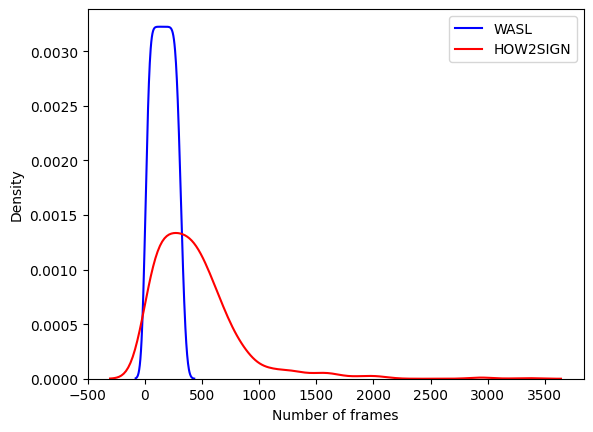

In [13]:
# Plot a kde plot of  the same
import seaborn as sns
sns.kdeplot(list(num_frames_dict.keys()), color = 'b', label = 'WASL')
sns.kdeplot(list(num_frames_dict_isign.keys()), color = 'r', label = 'HOW2SIGN')
plt.xlabel('Number of frames')
plt.ylabel('Density')
plt.legend()
plt.show()

In [1]:
import os
import torch
import random
import ast
import numpy as np
from datasets import Dataset
from process_data_kmeansCISLR import get_pose_keypoints
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer
import pandas as pd

train_df = pd.read_csv('/DATA3/vaibhav/isign/PretrainingISL/train_Blimp22M.csv') 
# train_df.columns
train_df = train_df.rename(columns={'uids': 'uid_list'})
train_df = train_df.sample(n = 100000)
train_video_uids = train_df['uid_list'].apply(ast.literal_eval).tolist()
video_dir = "/DATA7/vaibhav/tokenization/CISLR/CISLR_v1.5-a_videos_poses/"

def load_and_preprocess_features(video_paths):
    all_features_length = 0
    for video_path in video_paths:
        # Construct the full path to the pose file
        if len(video_path) == 0:
            continue
        else:
            # Random sample a video from the list of videos
            video_path = random.choice(video_path)
        pose_file_path = os.path.join(video_dir, video_path + '.pose')
        # Load the pose file
        data_buffer = open(pose_file_path, "rb").read()
        pose = Pose.read(data_buffer)
        all_features_length += pose.body.data.shape[0]
    return all_features_length
        
# Make a dictionary for calculating the number of frames in each video
num_frames_dict = {}
for video_path in train_video_uids:
    feature_len = load_and_preprocess_features(video_path)
    #print(feature_len)
    # Add feature length to the dictionary if it is not already present else increment the count
    if feature_len not in num_frames_dict:
        num_frames_dict[feature_len] = 1
    else:
        num_frames_dict[feature_len] += 1




/home/el/miniconda3/envs/nmt2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MT mean and std of the number of frames in the dataset
904.40587 458.15511102632405


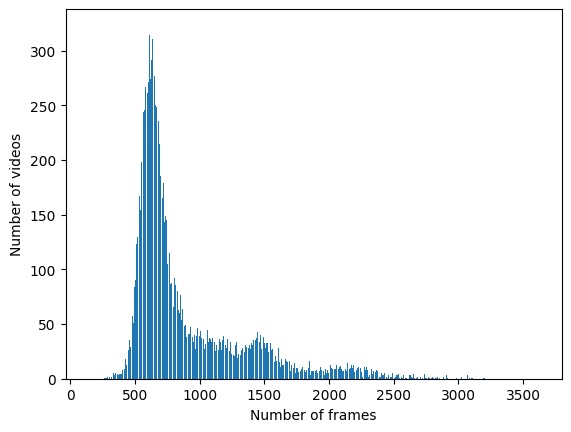

In [2]:
# Get the mean and standard deviation of the number of frames of all the videos in the dataset
# Get the key multiply it by the count and sum it up and then take the mean

mean_num_frames = sum([key * value for key, value in num_frames_dict.items()]) / sum(num_frames_dict.values())
std_num_frames = np.sqrt(sum([value * (key - mean_num_frames) ** 2 for key, value in num_frames_dict.items()]) / sum(num_frames_dict.values()))
print("MT mean and std of the number of frames in the dataset")
print(mean_num_frames, std_num_frames)


# Plot the num_frames_dict to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict.keys(), num_frames_dict.values())
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()





In [16]:
POSE_DIR_ISIGN = "/DATA7/vaibhav/isign/Data/iSign-poses_v1.1/"

def load_and_preprocess_features_isign(video_path):
    video_path = POSE_DIR_ISIGN+video_path+'.pose'
    data_buffer = open(video_path, "rb").read()
    pose = Pose.read(data_buffer)
    # if self.step_frames is None:
    #     self.step_frames = np.random.randint(2, 16)
    return pose.body.data.shape[0]

train_df2 = pd.read_csv('/DATA3/vaibhav/isign/PretrainingISL/isign_new.csv')
#train_df2 = train_df2.rename(columns={'sentence_with_punctuation': 'text', 'SENTENCE_ID': 'uid'})
#train_df2 = train_df2.sample(n = 1000)
train_video_uids2 = train_df2['uid'].tolist()
#Make a dictionary for calculating the number of frames in each video

num_frames_dict_isign = {}
for video_path in train_video_uids2:
    feature_len = load_and_preprocess_features_isign(video_path)
    #print(feature_len)
    # Add feature length to the dictionary if it is not already present else increment the count
    if feature_len not in num_frames_dict_isign:
        num_frames_dict_isign[feature_len] = 1
    else:
        num_frames_dict_isign[feature_len] += 1






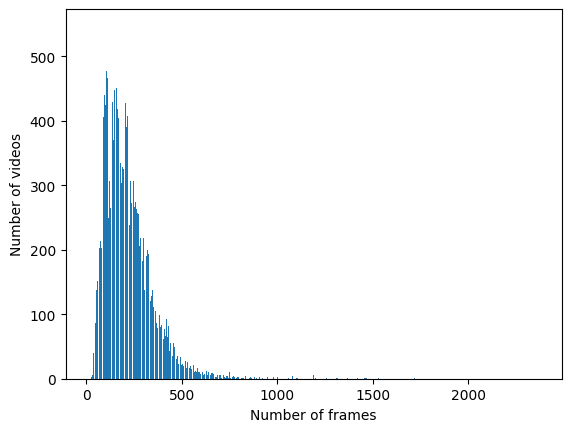

220.62863404821712 127.50679589901456


In [17]:
# Plot the num_frames_dict to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict_isign.keys(), num_frames_dict_isign.values())
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()



mean_num_frames = sum([key * value for key, value in num_frames_dict_isign.items()]) / sum(num_frames_dict_isign.values())
std_num_frames = np.sqrt(sum([value * (key - mean_num_frames) ** 2 for key, value in num_frames_dict_isign.items()]) / sum(num_frames_dict_isign.values()))
print(mean_num_frames, std_num_frames)


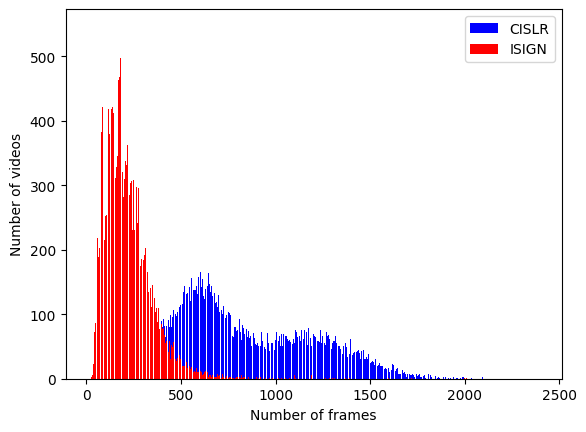

In [18]:
# Plot the num_frames_dict and the num_frames_dict_isign to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict.keys(), num_frames_dict.values(), color = 'b', label = 'CISLR')
plt.bar(num_frames_dict_isign.keys(), num_frames_dict_isign.values(), color = 'r', label = 'ISIGN')
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.legend()
plt.show()


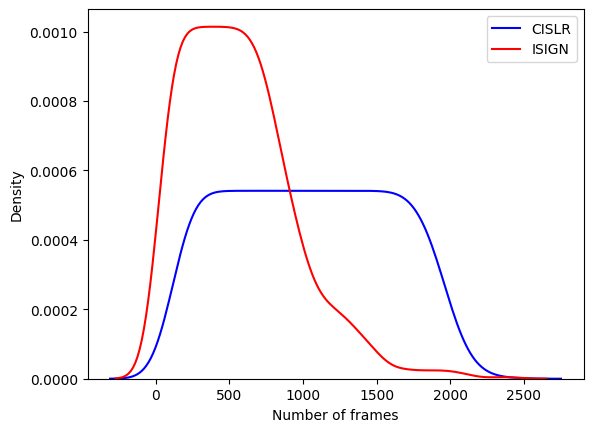

In [19]:
# Plot a kde plot of  the same
import seaborn as sns
sns.kdeplot(list(num_frames_dict.keys()), color = 'b', label = 'CISLR')
sns.kdeplot(list(num_frames_dict_isign.keys()), color = 'r', label = 'ISIGN')
plt.xlabel('Number of frames')
plt.ylabel('Density')
plt.legend()
plt.show()

In [20]:
import os
import torch
import random
import ast
import numpy as np
from datasets import Dataset
from process_data_kmeansCISLR import get_pose_keypoints
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer
import pandas as pd

train_df = pd.read_csv('/DATA3/vaibhav/isign/PretrainingISL/train_MT16M.csv') 
# train_df.columns
train_df = train_df.rename(columns={'uids': 'uid_list'})
train_df = train_df.sample(n = 100000)
train_video_uids = train_df['uid_list'].apply(ast.literal_eval).tolist()
video_dir = "/DATA7/vaibhav/tokenization/CISLR/CISLR_v1.5-a_videos_poses/"

def load_and_preprocess_features(video_paths):
    all_features_length = 0
    for video_path in video_paths:
        # Construct the full path to the pose file
        if len(video_path) == 0:
            continue
        else:
            # Random sample a video from the list of videos
            video_path = random.choice(video_path)
        pose_file_path = os.path.join(video_dir, video_path + '.pose')
        # Load the pose file
        data_buffer = open(pose_file_path, "rb").read()
        pose = Pose.read(data_buffer)
        random_frame = random.randint(1, 4) + 3
        all_features_length += (pose.body.data.shape[0] // random_frame)
    return all_features_length
        
# Make a dictionary for calculating the number of frames in each video
num_frames_dict = {}
for video_path in train_video_uids:
    feature_len = load_and_preprocess_features(video_path)
    #print(feature_len)
    # Add feature length to the dictionary if it is not already present else increment the count
    if feature_len not in num_frames_dict:
        num_frames_dict[feature_len] = 1
    else:
        num_frames_dict[feature_len] += 1




MT mean and std of the number of frames in the dataset
153.13003 68.11378555181837


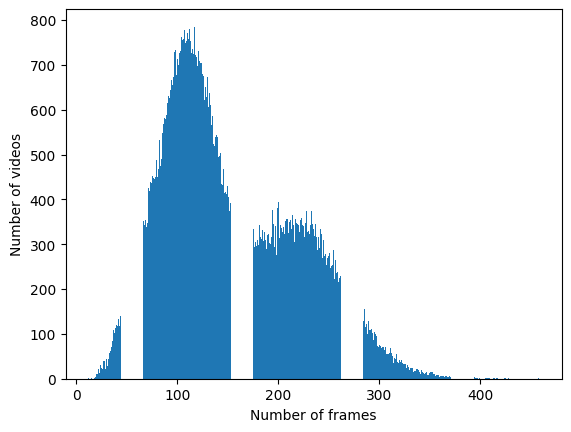

In [21]:
# Get the mean and standard deviation of the number of frames of all the videos in the dataset
# Get the key multiply it by the count and sum it up and then take the mean

mean_num_frames = sum([key * value for key, value in num_frames_dict.items()]) / sum(num_frames_dict.values())
std_num_frames = np.sqrt(sum([value * (key - mean_num_frames) ** 2 for key, value in num_frames_dict.items()]) / sum(num_frames_dict.values()))
print("MT mean and std of the number of frames in the dataset")
print(mean_num_frames, std_num_frames)


# Plot the num_frames_dict to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict.keys(), num_frames_dict.values())
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()





In [22]:
POSE_DIR_ISIGN = "/DATA7/vaibhav/isign/Data/iSign-poses_v1.1/"

def load_and_preprocess_features_isign(video_path):
    video_path = POSE_DIR_ISIGN+video_path+'.pose'
    data_buffer = open(video_path, "rb").read()
    pose = Pose.read(data_buffer)
    random_frame = random.randint(1, 4)
    # if self.step_frames is None:
    #     self.step_frames = np.random.randint(2, 16)
    return pose.body.data.shape[0] // random_frame

train_df2 = pd.read_csv('/DATA3/vaibhav/isign/PretrainingISL/isign_new.csv')
#train_df2 = train_df2.rename(columns={'sentence_with_punctuation': 'text', 'SENTENCE_ID': 'uid'})
#train_df2 = train_df2.sample(n = 1000)
train_video_uids2 = train_df2['uid'].tolist()
#Make a dictionary for calculating the number of frames in each video

num_frames_dict_isign = {}
for video_path in train_video_uids2:
    feature_len = load_and_preprocess_features_isign(video_path)
    #print(feature_len)
    # Add feature length to the dictionary if it is not already present else increment the count
    if feature_len not in num_frames_dict_isign:
        num_frames_dict_isign[feature_len] = 1
    else:
        num_frames_dict_isign[feature_len] += 1






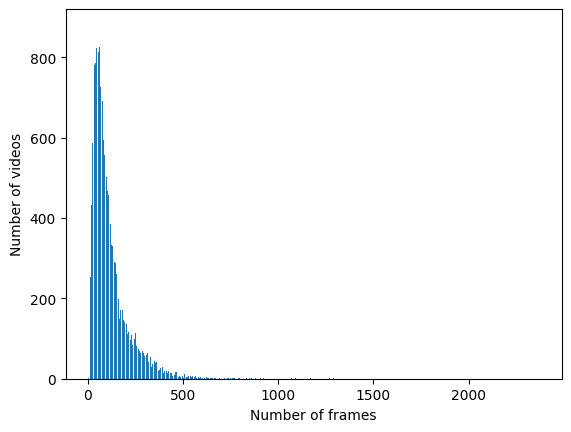

114.80614072836084 100.58062404463926


In [23]:
# Plot the num_frames_dict to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict_isign.keys(), num_frames_dict_isign.values())
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.show()



mean_num_frames = sum([key * value for key, value in num_frames_dict_isign.items()]) / sum(num_frames_dict_isign.values())
std_num_frames = np.sqrt(sum([value * (key - mean_num_frames) ** 2 for key, value in num_frames_dict_isign.items()]) / sum(num_frames_dict_isign.values()))
print(mean_num_frames, std_num_frames)


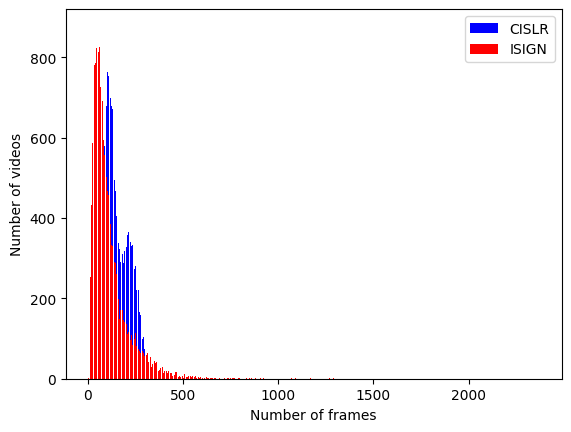

In [24]:
# Plot the num_frames_dict and the num_frames_dict_isign to see the distribution of number of frames in each video
import matplotlib.pyplot as plt
plt.bar(num_frames_dict.keys(), num_frames_dict.values(), color = 'b', label = 'CISLR')
plt.bar(num_frames_dict_isign.keys(), num_frames_dict_isign.values(), color = 'r', label = 'ISIGN')
plt.xlabel('Number of frames')
plt.ylabel('Number of videos')
plt.legend()
plt.show()


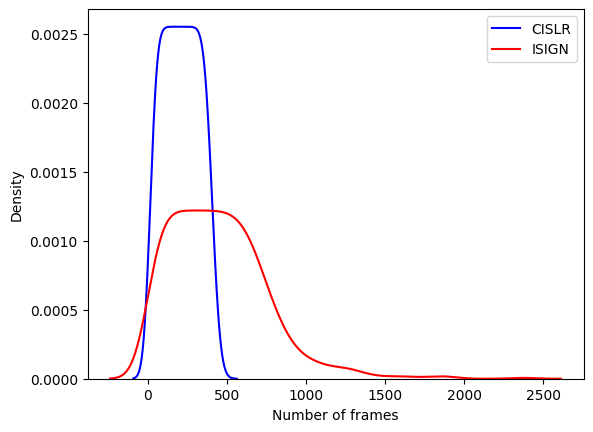

In [25]:
# Plot a kde plot of  the same
import seaborn as sns
sns.kdeplot(list(num_frames_dict.keys()), color = 'b', label = 'CISLR')
sns.kdeplot(list(num_frames_dict_isign.keys()), color = 'r', label = 'ISIGN')
plt.xlabel('Number of frames')
plt.ylabel('Density')
plt.legend()
plt.show()